In [1]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix, classification_report,roc_curve,auc
from sklearn import metrics


In [2]:
# Read File
df=pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.shape

(11162, 17)

In [6]:
# mapping
df['deposit']=df['deposit'].map({'yes':1,"no":0})

In [7]:
df['deposit']

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [10]:
list(df.select_dtypes(include='object').columns)

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [11]:
# encoding
def preprocessor(df):
    res_df=df.copy()
    x=list(df.select_dtypes(include='object').columns)
    for i in x:
        res_df[i]=res_df[i].astype('category')
        res_df[i]=res_df[i].cat.codes
        res_df=pd.get_dummies(res_df,columns=[i],drop_first=True)
    return res_df

In [12]:
encoded_df=preprocessor(df)
encoded_df

,age,balance,day,duration,campaign,pdays,previous,deposit,job_1,job_2,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_1,poutcome_2,poutcome_3
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,733,16,83,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,8,9,2,172,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [14]:
# Separating x and y
X=encoded_df.drop('deposit',axis=1)
X.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8',
       'job_9', 'job_10', 'job_11', 'marital_1', 'marital_2', 'education_1',
       'education_2', 'education_3', 'default_1', 'housing_1', 'loan_1',
       'contact_1', 'contact_2', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'poutcome_1', 'poutcome_2', 'poutcome_3'],
      dtype='object')

In [15]:
y=encoded_df['deposit'].values
x=encoded_df.drop('deposit',axis=1).values

In [16]:
# Split Data into Train and Test data sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
# Dec tree with depth 4
model_dt_4=DecisionTreeClassifier(random_state=1,max_depth=4)
model_dt_4.fit(X_train,y_train)

y_pred_4=model_dt_4.predict(X_test)
accuracy_score(y_test,y_pred_4)

0.7769816390506046

In [21]:
# Dec tree with depth 6
model_dt_6=DecisionTreeClassifier(random_state=1,max_depth=6)
model_dt_6.fit(X_train,y_train)

y_pred_6=model_dt_6.predict(X_test)
accuracy_score(y_test,y_pred_6)

0.8016121809225257

In [22]:
# Dec tree with depth 4 and entropy
model_dt_ent=DecisionTreeClassifier(random_state=1,max_depth=4,criterion='entropy')
model_dt_ent.fit(X_train,y_train)

y_pred_ent=model_dt_ent.predict(X_test)
accuracy_score(y_test,y_pred_ent)

0.7586206896551724

In [23]:
# Dec tree with depth 8
model_dt_8=DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt_8.fit(X_train,y_train)

y_pred_8=model_dt_8.predict(X_test)
accuracy_score(y_test,y_pred_8)

0.8159426780116436

In [24]:
# class. report
print(classification_report(y_test,y_pred_8))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1173
           1       0.80      0.81      0.81      1060

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



C:\Users\abhinav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


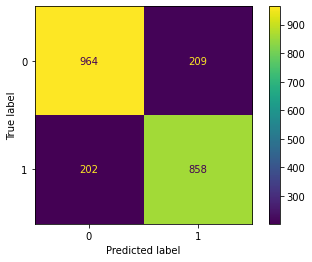

In [26]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_dt_8,X_test,y_test)
plt.show()

In [27]:
# Feature importance 
model_dt_8.feature_importances_

array([1.63504006e-02, 2.06872172e-02, 1.69535414e-02, 5.00248756e-01,
       5.23655145e-03, 1.79202717e-02, 6.08873584e-03, 0.00000000e+00,
       2.20290324e-03, 0.00000000e+00, 2.44584660e-03, 0.00000000e+00,
       0.00000000e+00, 6.96172329e-04, 3.49537867e-03, 6.11947322e-04,
       0.00000000e+00, 4.07964881e-04, 1.64157033e-03, 4.23059398e-03,
       8.15929762e-04, 0.00000000e+00, 3.90604673e-04, 0.00000000e+00,
       4.73242735e-02, 2.00589755e-03, 1.54578803e-04, 1.16698656e-01,
       5.27924108e-03, 7.57649065e-04, 6.64660912e-03, 0.00000000e+00,
       7.37699065e-03, 9.82936251e-03, 3.88079245e-02, 2.14578329e-03,
       2.80252821e-03, 2.71795686e-02, 3.94702865e-04, 1.08822330e-03,
       1.31083625e-01, 0.00000000e+00])

In [28]:
pd.DataFrame(index=X.columns,data=model_dt_8.feature_importances_,columns=['Feature impor'])

,Feature impor
age,0.016350
balance,0.020687
day,0.016954
duration,0.500249
campaign,0.005237
pdays,0.017920
previous,0.006089
job_1,0.000000
job_2,0.002203
job_3,0.000000


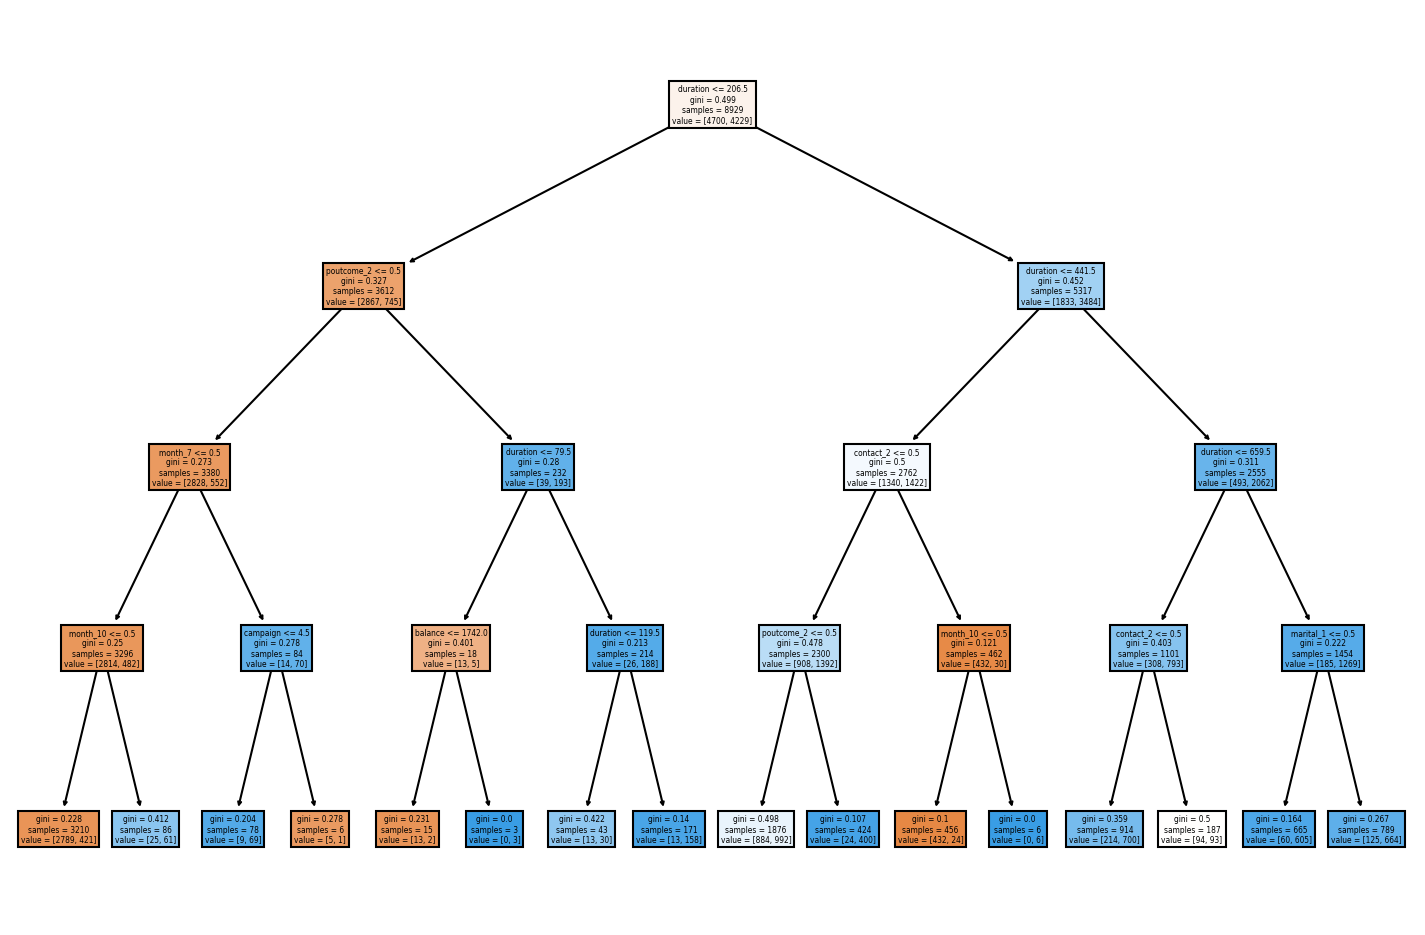

In [29]:
# tree visual.
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model_dt_4,filled=True,feature_names=X.columns)
plt.show()

In [ ]:
# Model -2

In [30]:
from sklearn.preprocessing import LabelEncoder

In [33]:
# encoding
def preprocessor(df):
    res_df1=df.copy()
    le=LabelEncoder()
    x=list(df.select_dtypes(include='object').columns)
    for i in x:
        res_df1[i]=le.fit_transform(res_df1[i])
    return res_df1

In [34]:
encoded_df1=preprocessor(df)
encoded_df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [36]:
# seprating x and y
X=encoded_df1.drop('deposit',axis=1)
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [37]:
y=encoded_df1['deposit'].values
x=encoded_df1.drop('deposit',axis=1).values

In [38]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [39]:
## Dec tree with depth 4
model_dt_4=DecisionTreeClassifier(random_state=1,max_depth=4)
model_dt_4.fit(X_train,y_train)

y_pred_4=model_dt_4.predict(X_test)
accuracy_score(y_test,y_pred_4)

0.7850425436632333

In [40]:
# Dec tree with depth 6
model_dt_6=DecisionTreeClassifier(random_state=1,max_depth=6)
model_dt_6.fit(X_train,y_train)

y_pred_6=model_dt_6.predict(X_test)
accuracy_score(y_test,y_pred_6)

0.812360053739364

In [41]:
# Dec tree with depth 4 and entropy
model_dt_ent=DecisionTreeClassifier(random_state=1,max_depth=4,criterion='entropy')
model_dt_ent.fit(X_train,y_train)

y_pred_ent=model_dt_ent.predict(X_test)
accuracy_score(y_test,y_pred_ent)

0.761307657859382

In [42]:
# feature importance
pd.DataFrame(index=X.columns,data=model_dt_6.feature_importances_,columns=['Feature impor'])

,Feature impor
age,0.011981
job,0.000000
marital,0.001330
education,0.000000
default,0.000000
balance,0.003629
housing,0.066840
loan,0.000000
contact,0.121655
day,0.007626


In [48]:
from sklearn.model_selection import GridSearchCV

In [116]:
# Split Data into Train and Test data sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [117]:
fit_dt = DecisionTreeClassifier(random_state=17)

In [118]:
param_dist = {'max_depth': [2, 3, 4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,14]}

In [119]:
cv_dt = GridSearchCV(fit_dt, cv = 15,
                     param_grid=param_dist)

In [120]:
cv_dt.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [4, 6, 8, 10, 12, 14]})

In [121]:
print('Best Parameters using grid search: \n', cv_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 14}


In [129]:
cv_dt.best_score_

0.8118449796025795

In [122]:
fit_dt.set_params(criterion = 'gini',
                max_depth =8, max_leaf_nodes=14)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=14, random_state=17)

In [123]:
fit_dt.fit(X_train, y_train)
y_pred = fit_dt.predict(X_test)

C:\Users\abhinav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


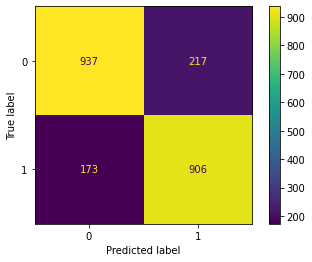

In [125]:
plot_confusion_matrix(fit_dt, X_test, y_test)

In [124]:
accuracy_rf = accuracy_score(y_test,y_pred)
accuracy_rf

0.825347066726377

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1154
           1       0.81      0.84      0.82      1079

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



In [127]:
y_pred_train = fit_dt.predict(X_train)

In [128]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      4719
           1       0.80      0.83      0.81      4210

    accuracy                           0.82      8929
   macro avg       0.82      0.82      0.82      8929
weighted avg       0.82      0.82      0.82      8929



In [131]:
y_pred1=cv_dt.predict(X_test)
accuracy_rf1 = accuracy_score(y_test,y_pred1)
accuracy_rf1

0.825347066726377